In [1]:
# this dosn't really count toward the "one-liner"; I just don't want to have to bounce the 
# JupyterHub server in order to update the LD_LIBRARY_PATH for the bash kernel
export LD_LIBRARY_PATH=/usr/local/lib

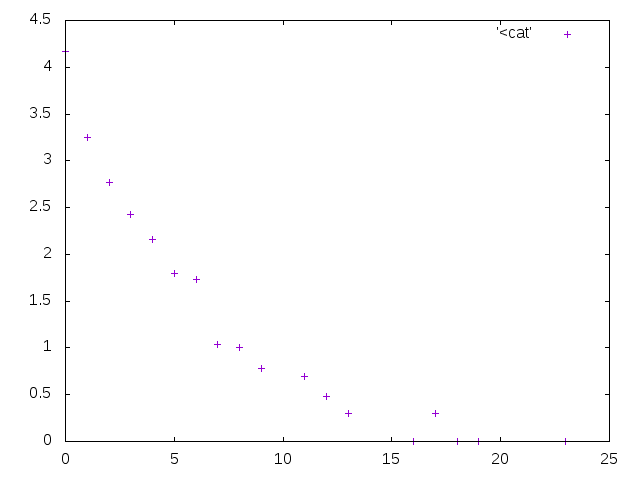

In [3]:
egrep $'\tinteracts-with\t|\tin-complex-with\t' shared/pathway_commons.sif  | \
 cut -f1,3 | \
 sed 's/\t/\n/g' | \
 sort | \
 uniq -c | \
 sort -k1nr | \
 sed 's/^\s*//g' | \
 cut -f1 -d\  | \
 awk '{print int(int($1)/100)}' | \
 sort | \
 uniq -c | \
 awk 'BEGIN { print "set term png\nset out\nplot '\''<cat'\''"} { print $2 "\t" log($1)/log(10)}' | \
 gnuplot -p | display